### Problem 1

In [1]:
label <- c("1","a","b","ab","c","ac","bc","abc","d","ad","bd","abd","cd","acd","bcd","abcd")
value <- c(12,18,13,16,17,15,20,15,10,25,13,24,19,21,17,23)
a <- c(-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1)
b <- c(-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1)
c <- c(-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1)
d <- c(-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1)
ab <- a*b
ac <- a*c
ad <- a*d
bc <- b*c
bd <- b*d
cd <- c*d
abc <- a*b*c
abd <- a*b*d
acd <- a*c*d
bcd <- b*c*d
abcd <- a*b*c*d
u <- c(a,b,c,d,ab,ac,ad,bc,bd,cd,abc,abd,acd,bcd,abcd)
data <- data.frame(label=label,
                   a=a,
                   b=b,
                   c=c,
                   d=d,
                   ab=ab,
                   ac=ac,
                   ad=ad,
                   bc=bc,
                   bd=bd,
                   cd=cd,
                   abc=abc,
                   abd=abd,
                   bcd=bcd,
                   abcd=abcd,               
                   value=value)
data

label,a,b,c,d,ab,ac,ad,bc,bd,cd,abc,abd,bcd,abcd,value
1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,1,12
a,1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,-1,-1,18
b,-1,1,-1,-1,-1,1,1,-1,-1,1,1,1,1,-1,13
ab,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,16
c,-1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,17
ac,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,1,1,1,15
bc,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,-1,1,20
abc,1,1,1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,15
d,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,1,-1,10
ad,1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,1,25


#### a. Based on the sums of saures, which factors appear to have large effects?

In [72]:
summary(aov(value~a*b*c*d))

            Df Sum Sq Mean Sq
a            1  81.00   81.00
b            1   1.00    1.00
c            1  16.00   16.00
d            1  42.25   42.25
a:b          1   2.25    2.25
a:c          1  72.25   72.25
b:c          1   0.25    0.25
a:d          1  64.00   64.00
b:d          1   0.00    0.00
c:d          1   0.00    0.00
a:b:c        1   4.00    4.00
a:b:d        1   2.25    2.25
a:c:d        1   0.25    0.25
b:c:d        1   2.25    2.25
a:b:c:d      1   4.00    4.00

a項擁有對sum of square最大的影響

#### b. Conduct an analysis of variance using the normal probability plot in part (a) for guidance in forming an error term. What are your conclusions?

依據上表，將除了a,c,d,ac,ad外的其他項當作error。

anova表:

In [81]:
model<-lm(value~a*c+a*d,data)
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
a,1,81.00,81.000,49.846154,3.456198e-05
c,1,16.00,16.000,9.846154,1.054853e-02
d,1,42.25,42.250,26.000000,4.646914e-04
a:c,1,72.25,72.250,44.461538,5.582907e-05
a:d,1,64.00,64.000,39.384615,9.193069e-05
Residuals,10,16.25,1.625,NA,NA


error的qq-plot:

In [86]:
fit <- lm(value~a*c+a*d,data)
summary(fit)


Call:
lm(formula = value ~ a * c + a * d, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6250 -0.9375  0.1250  0.8750  1.3750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.3750     0.3187  54.520 1.04e-13 ***
a             2.2500     0.3187   7.060 3.46e-05 ***
c             1.0000     0.3187   3.138 0.010549 *  
d             1.6250     0.3187   5.099 0.000465 ***
a:c          -2.1250     0.3187  -6.668 5.58e-05 ***
a:d           2.0000     0.3187   6.276 9.19e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.275 on 10 degrees of freedom
Multiple R-squared:  0.9443,	Adjusted R-squared:  0.9165 
F-statistic: 33.91 on 5 and 10 DF,  p-value: 5.856e-06


In [89]:
fit.rid <- resid(fit)

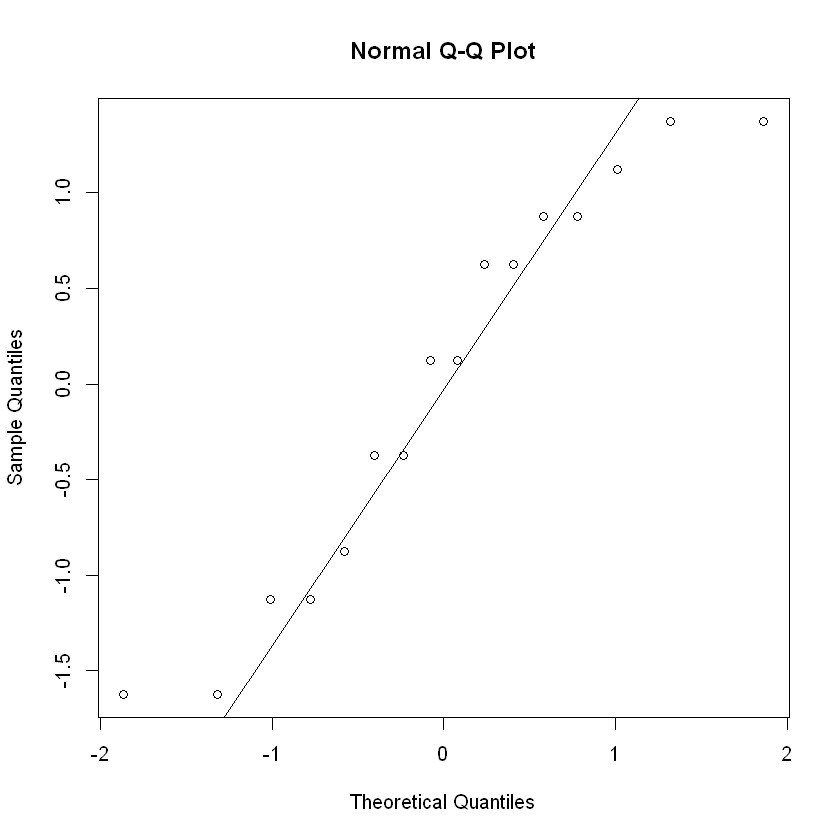

In [90]:
qqnorm(fit.rid)
qqline(fit.rid)

我認為誤差項皆很靠近qqline，所以其分布應該為接近常態。

c. Write down a regression model relating yield to the important process variables.

$yield=\mu+\beta_a*a+\beta_c*c+\beta_d*d+\beta_{ac}*ac+\beta_{ad}*ad+\epsilon$

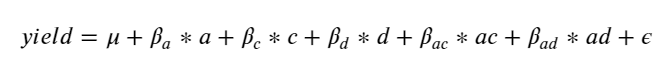

d. Analyze the residuals from this experiment. Does your analysis indicate any potential problems?

根據qqplot，殘差項應該沒有問題。

e. Can this design be collapsed into a $2^3$ design with two replicates? If so, sketch the design with the average and range of yield shown at each point in the cube. Interpret the results.

Yes,根據a題，factor B的效應小，我們應該可以將其忽略。將其重新分配後each point如下：

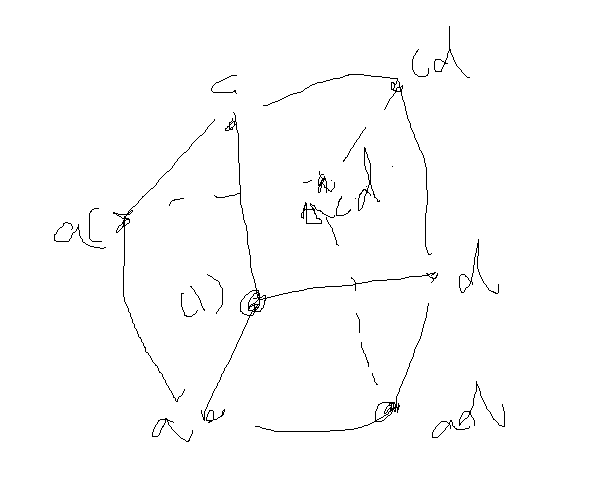

每個point剛好with two replicates。  
(1):1,b; range(12,13);avg:12.5    
a:a,ab; range(18,16);avg:17    
c:c,bc; range(17,19);avg:18  
d:d,bd; range(10,13);avg:11.5   
ac:ac,abc; range(15,15);avg:15   
ad:ad,abd; range(25,24);avg:24.5   
cd:cd,bcd; range(19,17);avg:18   
acd: acd,abcd; range(21,23);avg:22  

---

### Problem 2

In [103]:
library(car)

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

#### a. Analyze the data from this experiment as if there were eight replicates of a $2^3$ design. Comment on the results.

In [111]:
a <- c(-1,1,-1,1,-1,1,-1,1)
b <- c(-1,-1,1,1,-1,-1,1,1)
c <- c(-1,-1,-1,-1,1,1,1,1)
p1 <- c(11,15,9,16,10,12,10,15)
p2 <- c(9,10,12,17,11,13,12,12)
p3 <- c(10,16,11,15,15,14,13,15)
p4 <- c(10,14,11,12,8,13,10,13)
p5 <- c(11,12,11,13,6,9,7,12)
p6 <- c(10,9,11,13,6,9,7,12)
p7 <- c(8,6,11,11,9,14,17,9)
p8 <- c(9,15,12,11,14,9,13,14)
obs <- c(p1,p2,p3,p4,p5,p6,p7,p8)
A <- rep(a,time=8)
B <- rep(b,time=8)
C <- rep(c,time=8)
data <- data.frame(
    A=A,
    B=B,
    C=C,
    y=obs
)
data

A,B,C,y
-1,-1,-1,11
1,-1,-1,15
-1,1,-1,9
1,1,-1,16
-1,-1,1,10
1,-1,1,12
-1,1,1,10
1,1,1,15
-1,-1,-1,9
1,-1,-1,10


In [112]:
model <- lm(y~A*B*C,data)

In [113]:
summary(aov(model))

            Df Sum Sq Mean Sq F value  Pr(>F)   
A            1   68.1   68.06  10.662 0.00187 **
B            1   25.0   25.00   3.916 0.05275 . 
C            1    1.0    1.00   0.157 0.69377   
A:B          1    0.0    0.00   0.000 1.00000   
A:C          1    2.2    2.25   0.352 0.55512   
B:C          1    0.1    0.06   0.010 0.92153   
A:B:C        1    0.1    0.06   0.010 0.92153   
Residuals   56  357.5    6.38                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

在顯著水準為0.05的情況下，除了factor A外，其他項皆不顯著。平底鍋材質對於布朗尼的評分有顯著的影響。

b. Is the analysis in part (a) the correct approach? There are only eight batches; do we really have eight replicates of a $2^3$ factorial design?

這個試驗將第i批布朗尼交給8人評分，並重複八次，在假設每個人是獨立的情況下，這題其實並沒有真正的進行重複測量。

---

### Problem 3

#### a. Estimate the factor effects by running an analysis of variance.

In [130]:
label <- c("1","a","b","ab","c","ac","bc","abc","d","ad","bd","abd","cd","acd","bcd","abcd")
obs <- c(91,75,80,84,76,81,89,74,99,73,86,84,98,80,86,81)
a <- c(-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1)
b <- c(-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1)
c <- c(-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1)
d <- c(-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1)
data <- data.frame(
    label=label,
    A=a,B=b,C=c,D=d,
    ABCD=a*b*c*d,
    y=obs
)
data

label,A,B,C,D,ABCD,y
1,-1,-1,-1,-1,1,91
a,1,-1,-1,-1,-1,75
b,-1,1,-1,-1,-1,80
ab,1,1,-1,-1,1,84
c,-1,-1,1,-1,-1,76
ac,1,-1,1,-1,1,81
bc,-1,1,1,-1,1,89
abc,1,1,1,-1,-1,74
d,-1,-1,-1,1,-1,99
ad,1,-1,-1,1,1,73


total_ss

In [129]:
obs%*%obs-(sum(obs))^2/16

915.9375


In [124]:
mod <- aov(y~A*B*C*D,data)
summary(mod)

            Df Sum Sq Mean Sq
A            1  333.1   333.1
B            1    5.1     5.1
C            1    3.1     3.1
D            1   85.6    85.6
A:B          1   85.6    85.6
A:C          1    3.1     3.1
B:C          1    0.1     0.1
A:D          1   52.6    52.6
B:D          1   18.1    18.1
C:D          1   10.6    10.6
A:B:C        1  162.6   162.6
A:B:D        1   85.6    85.6
A:C:D        1    0.6     0.6
B:C:D        1   18.1    18.1
A:B:C:D      1   52.6    52.6

以上為不同factor的SS

#### b. Suppose it is only possible to run a one-half fraction of the 24 design. Construct the design and perform the statistical analysis.

取abcd為-時的處理：a,b,c,abc,d,abd,acd,bcd

In [132]:
mod <- aov(y~A+B+C+D+A:B:C+A:B:D+A:C:D+B:C:D,data)
summary(mod)

            Df Sum Sq Mean Sq F value Pr(>F)  
A            1  333.1   333.1  10.481 0.0143 *
B            1    5.1     5.1   0.159 0.7017  
C            1    3.1     3.1   0.096 0.7653  
D            1   85.6    85.6   2.693 0.1448  
A:B:C        1  162.6   162.6   5.116 0.0582 .
A:B:D        1   85.6    85.6   2.693 0.1448  
A:C:D        1    0.6     0.6   0.018 0.8979  
B:C:D        1   18.1    18.1   0.568 0.4755  
Residuals    7  222.4    31.8                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

在顯著水準為0.05的情況下，factor a對產量有顯著的影響，其aliases:BCD的sum of square遠小於A，故我判斷是A的組效應較為顯著。